In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('road1.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (9, 9), 0)
edges = cv2.Canny(blur, 50, 300)
lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=170, minLineLength=100, maxLineGap=150)

height, width = image.shape[:2]
center_bottom = (width // 2, height)

In [3]:
nearest_left_line = None
nearest_right_line = None
min_left_distance = float('inf')
min_right_distance = float('inf')
for line in lines:
    x1, y1, x2, y2 = line[0]
    distance = np.abs((x2 - x1) * (y1 - center_bottom[1]) - (x1 - center_bottom[0]) * (y2 - y1)) / np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    if x1 < center_bottom[0]:
        if distance < min_left_distance:
            nearest_left_line = line
            min_left_distance = distance
    elif x1 > center_bottom[0]:
        if distance < min_right_distance:
            nearest_right_line = line
            min_right_distance = distance

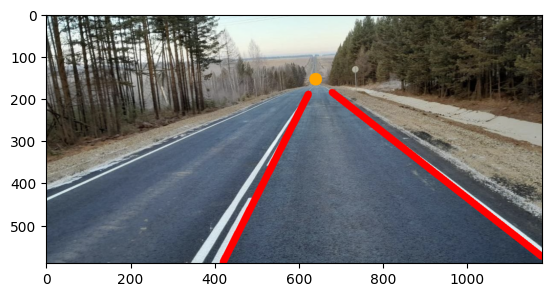

In [4]:
# Draw lines on original image
if nearest_left_line is not None:
    x1, y1, x2, y2 = nearest_left_line[0]
    cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 15)
if nearest_right_line is not None:
    x1, y1, x2, y2 = nearest_right_line[0]
    cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 15)

if nearest_left_line is not None and nearest_right_line is not None:
    x1_left, y1_left, x2_left, y2_left = nearest_left_line[0]
    x1_right, y1_right, x2_right, y2_right = nearest_right_line[0]
    m_left = (y2_left - y1_left) / (x2_left - x1_left)
    m_right = (y2_right - y1_right) / (x2_right - x1_right)
    b_left = y1_left - m_left * x1_left
    b_right = y1_right - m_right * x1_right
    x_intersect = (b_right - b_left) / (m_left - m_right)
    y_intersect = m_left * x_intersect + b_left
    cv2.circle(image, (int(x_intersect),int(y_intersect)), 15, (0, 165, 255), -1)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()